# Breast Cancer Detection
# 1. Identify the problem

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumour. A tumor does not mean cancer - tumours can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

# 1.1 Expected outcome

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle like a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent

# 1.2 Objective

Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

# 1.3 Identify data sources.

The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumour cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.

The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumour is benign or malignant.


In [225]:
#first importing all the importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
#loading the data to have the first look on it
df = pd.read_csv('/content/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [227]:
# checking the full size of the data
df.shape

(569, 33)

So, the data we have contains 569 rows and 33 columns.

In [228]:
#cheking the total information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Now, can see the overall information of the data, with the names of all the columns and number of non_null values and the datatype.

According to the requirement of the project we can see that the column of diagnosis which contains the results of the tests is in object data type.

This is not as same as the expeceted outcome. As the diagnosis is my 'y' variable. Thus, we'll have to convert the data type of the diagnosis column.


# EDA

In [229]:
#finding the sum of null values  inside of the data

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

This data is almost filled with all the data required, leaving one column. So, we'll drop the column as it is not filled with any data.

In [230]:
df = df.dropna(axis = 1)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [231]:
# Now, let's check the diagnosis column for all the unique values

df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

So, in this column we only have two unique values, which is 'M' for malignant and 'B' for benign. Now lets check how many patients have the result of each unique values.

In [232]:
value_count_diagnosis =df['diagnosis'].value_counts()

value_count_diagnosis

B    357
M    212
Name: diagnosis, dtype: int64

So there are 357 results for benign and 212 results for malignant.

In [233]:
# checking the percentage distribution of our target variable
total_patients = df['diagnosis'].value_counts().sum()

percent_distribution = value_count_diagnosis/total_patients*100

percent_distribution

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

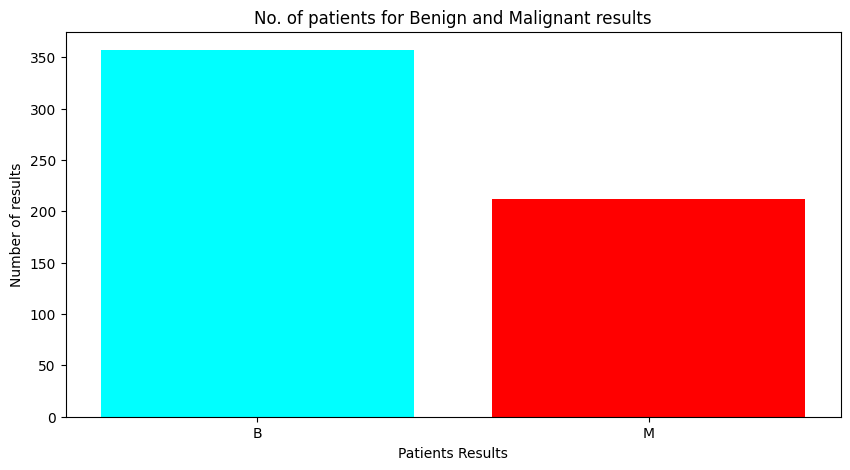

In [234]:
plt.figure(figsize= (10,5))

plt.bar(value_count_diagnosis.index, value_count_diagnosis.values, color = ['cyan','red'])

plt.title('No. of patients for Benign and Malignant results')
plt.xlabel('Patients Results')
plt.ylabel('Number of results')

plt.show()

In the above plot we can the nummber of the patients for each condition. But, as we have to build a model for classifying the patients if they carry cancerous cells or not, we will have to focus on our diagnosis column as its datatype as of now is object type. Therefore, we will have to convert the datatype into binary data.

FEATURE ENGINERRING

In [235]:
# encoding the categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [236]:
#lets check again the value counts of the our target variable

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

The datatype of our target variable is changed.

#  Visualization

Exploring the distribution of features and plotting the graphs to gain insights.

In [237]:
# selecting the columns to explore the distribution
features = df.iloc[:, 1:32]

features.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


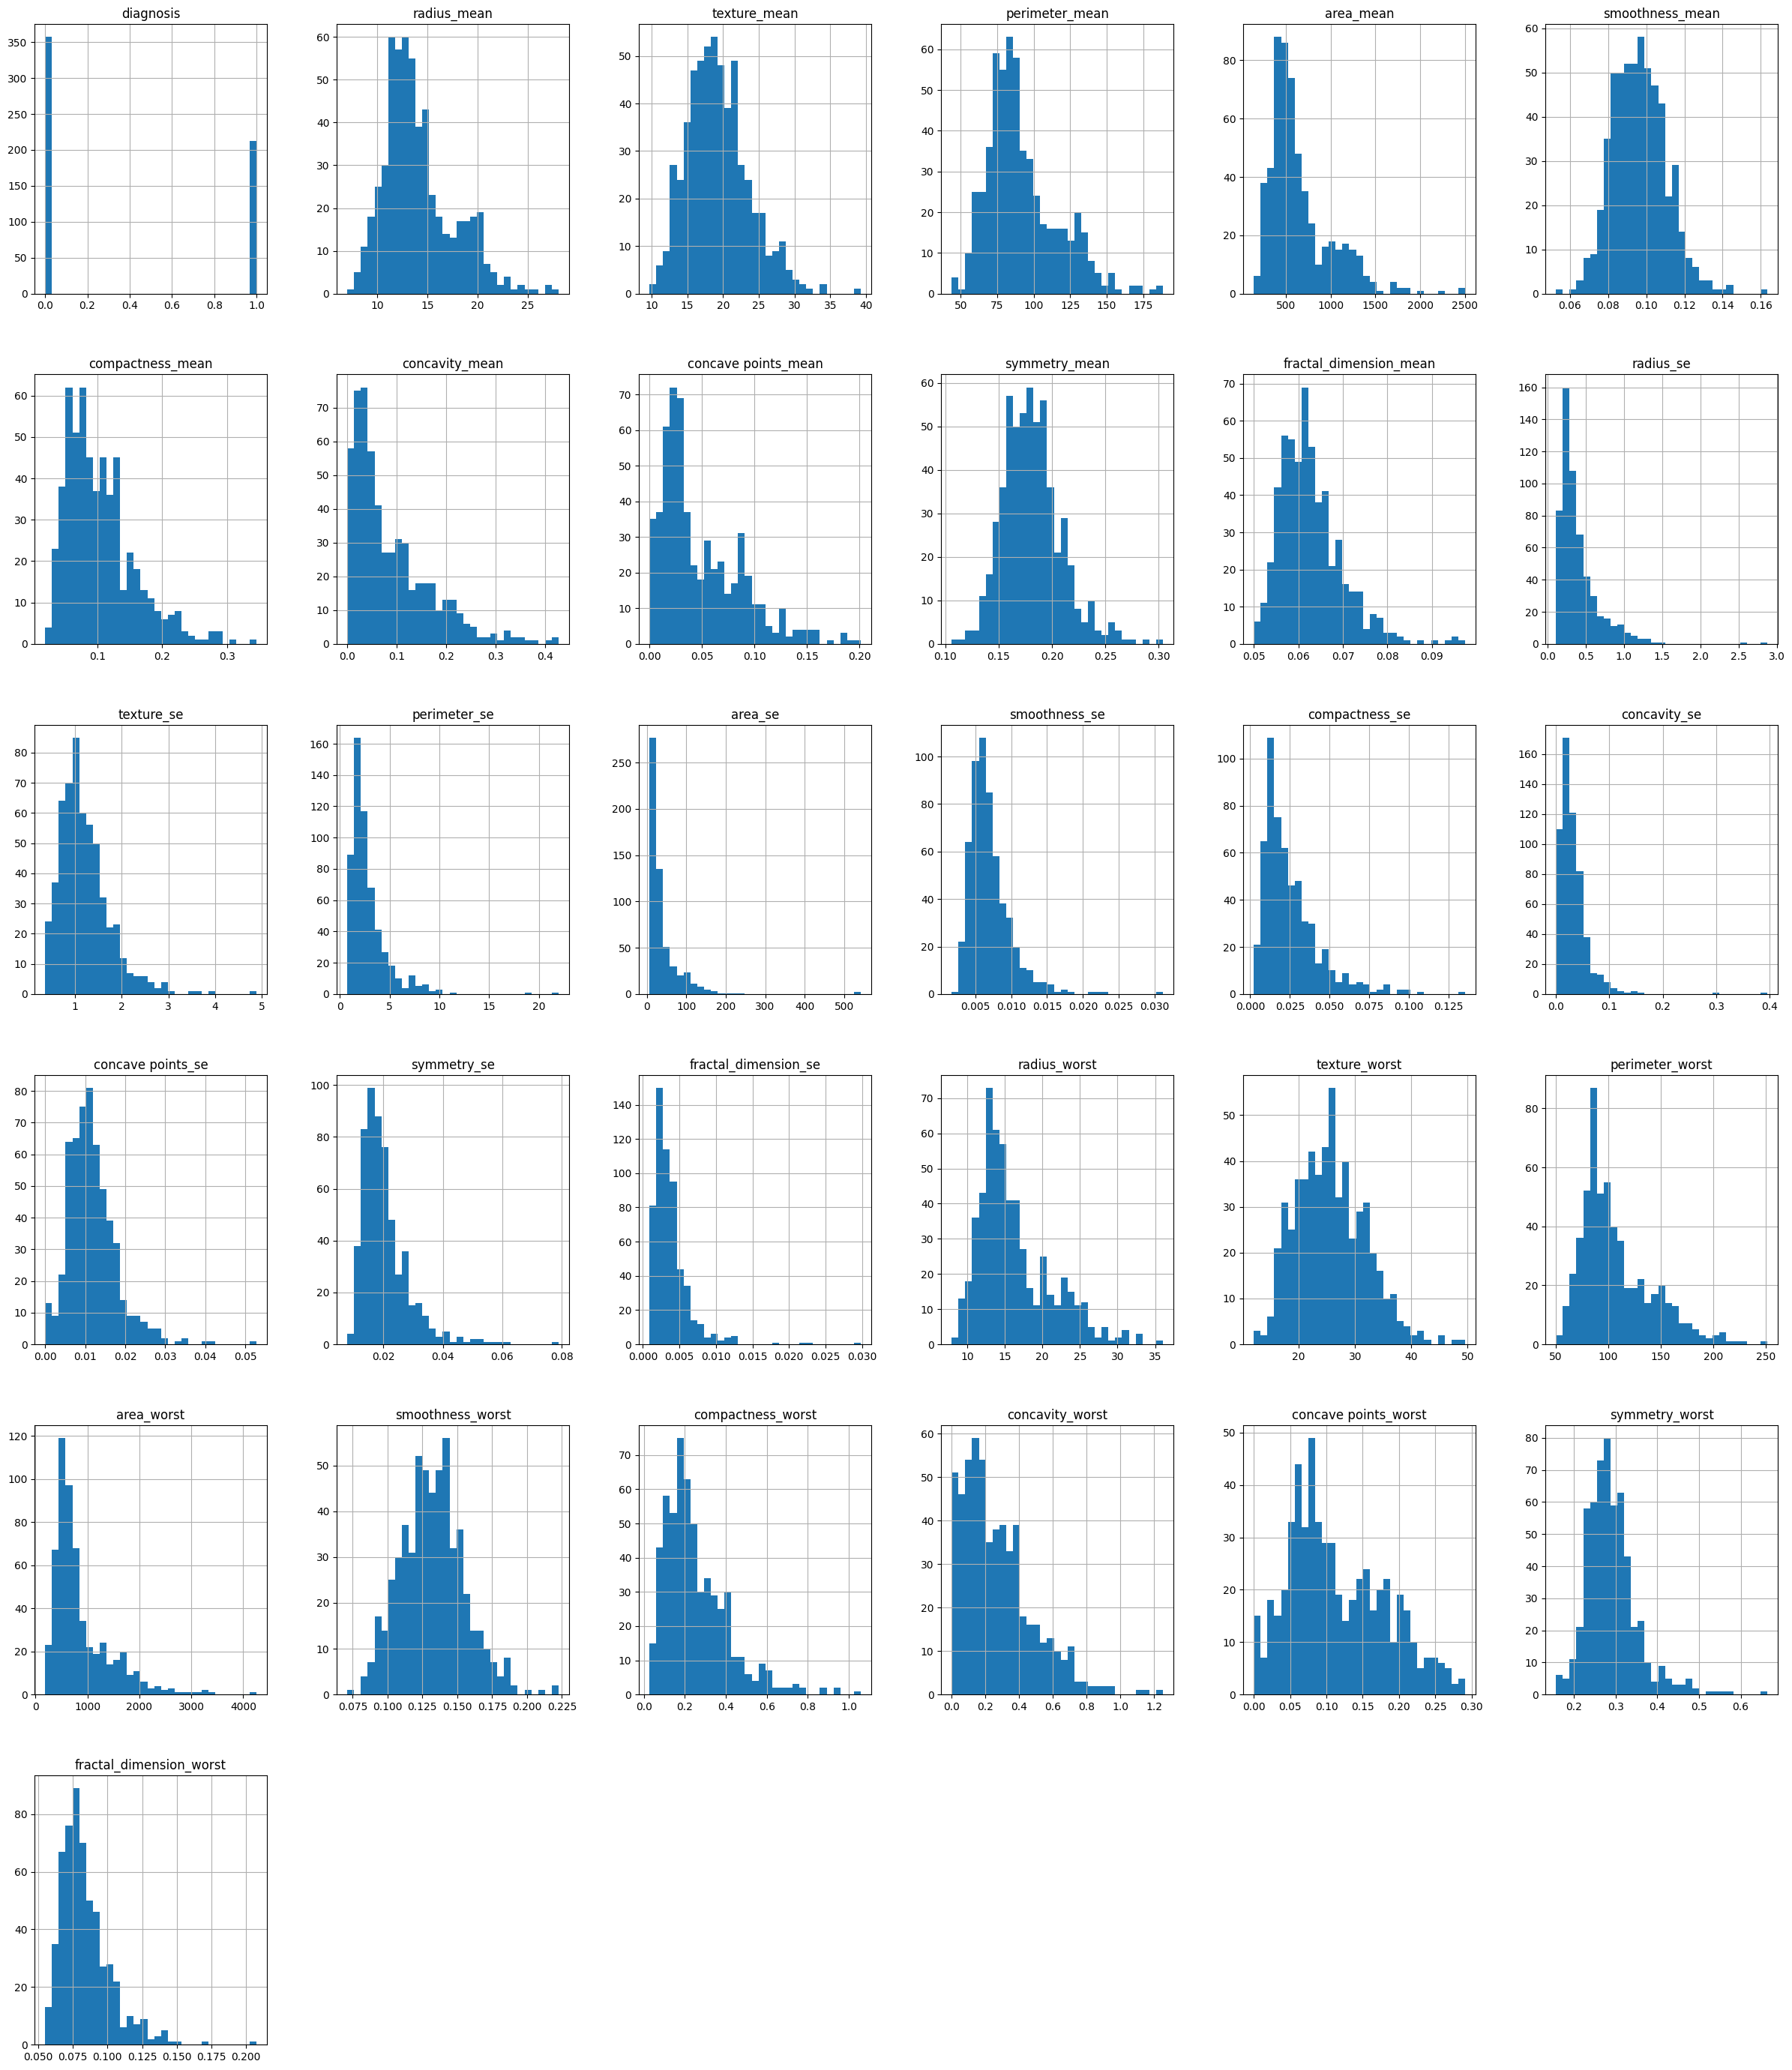

In [238]:
# plotting histogram to for all the features

histo = features.hist(bins = 31, figsize = (30,35), grid = True )

With this histogram plotting we can understand the quantitative data for each parameter of the breast cancer test. This shows the highest and lowest points for every parameter that helps to determine the results.

<Axes: >

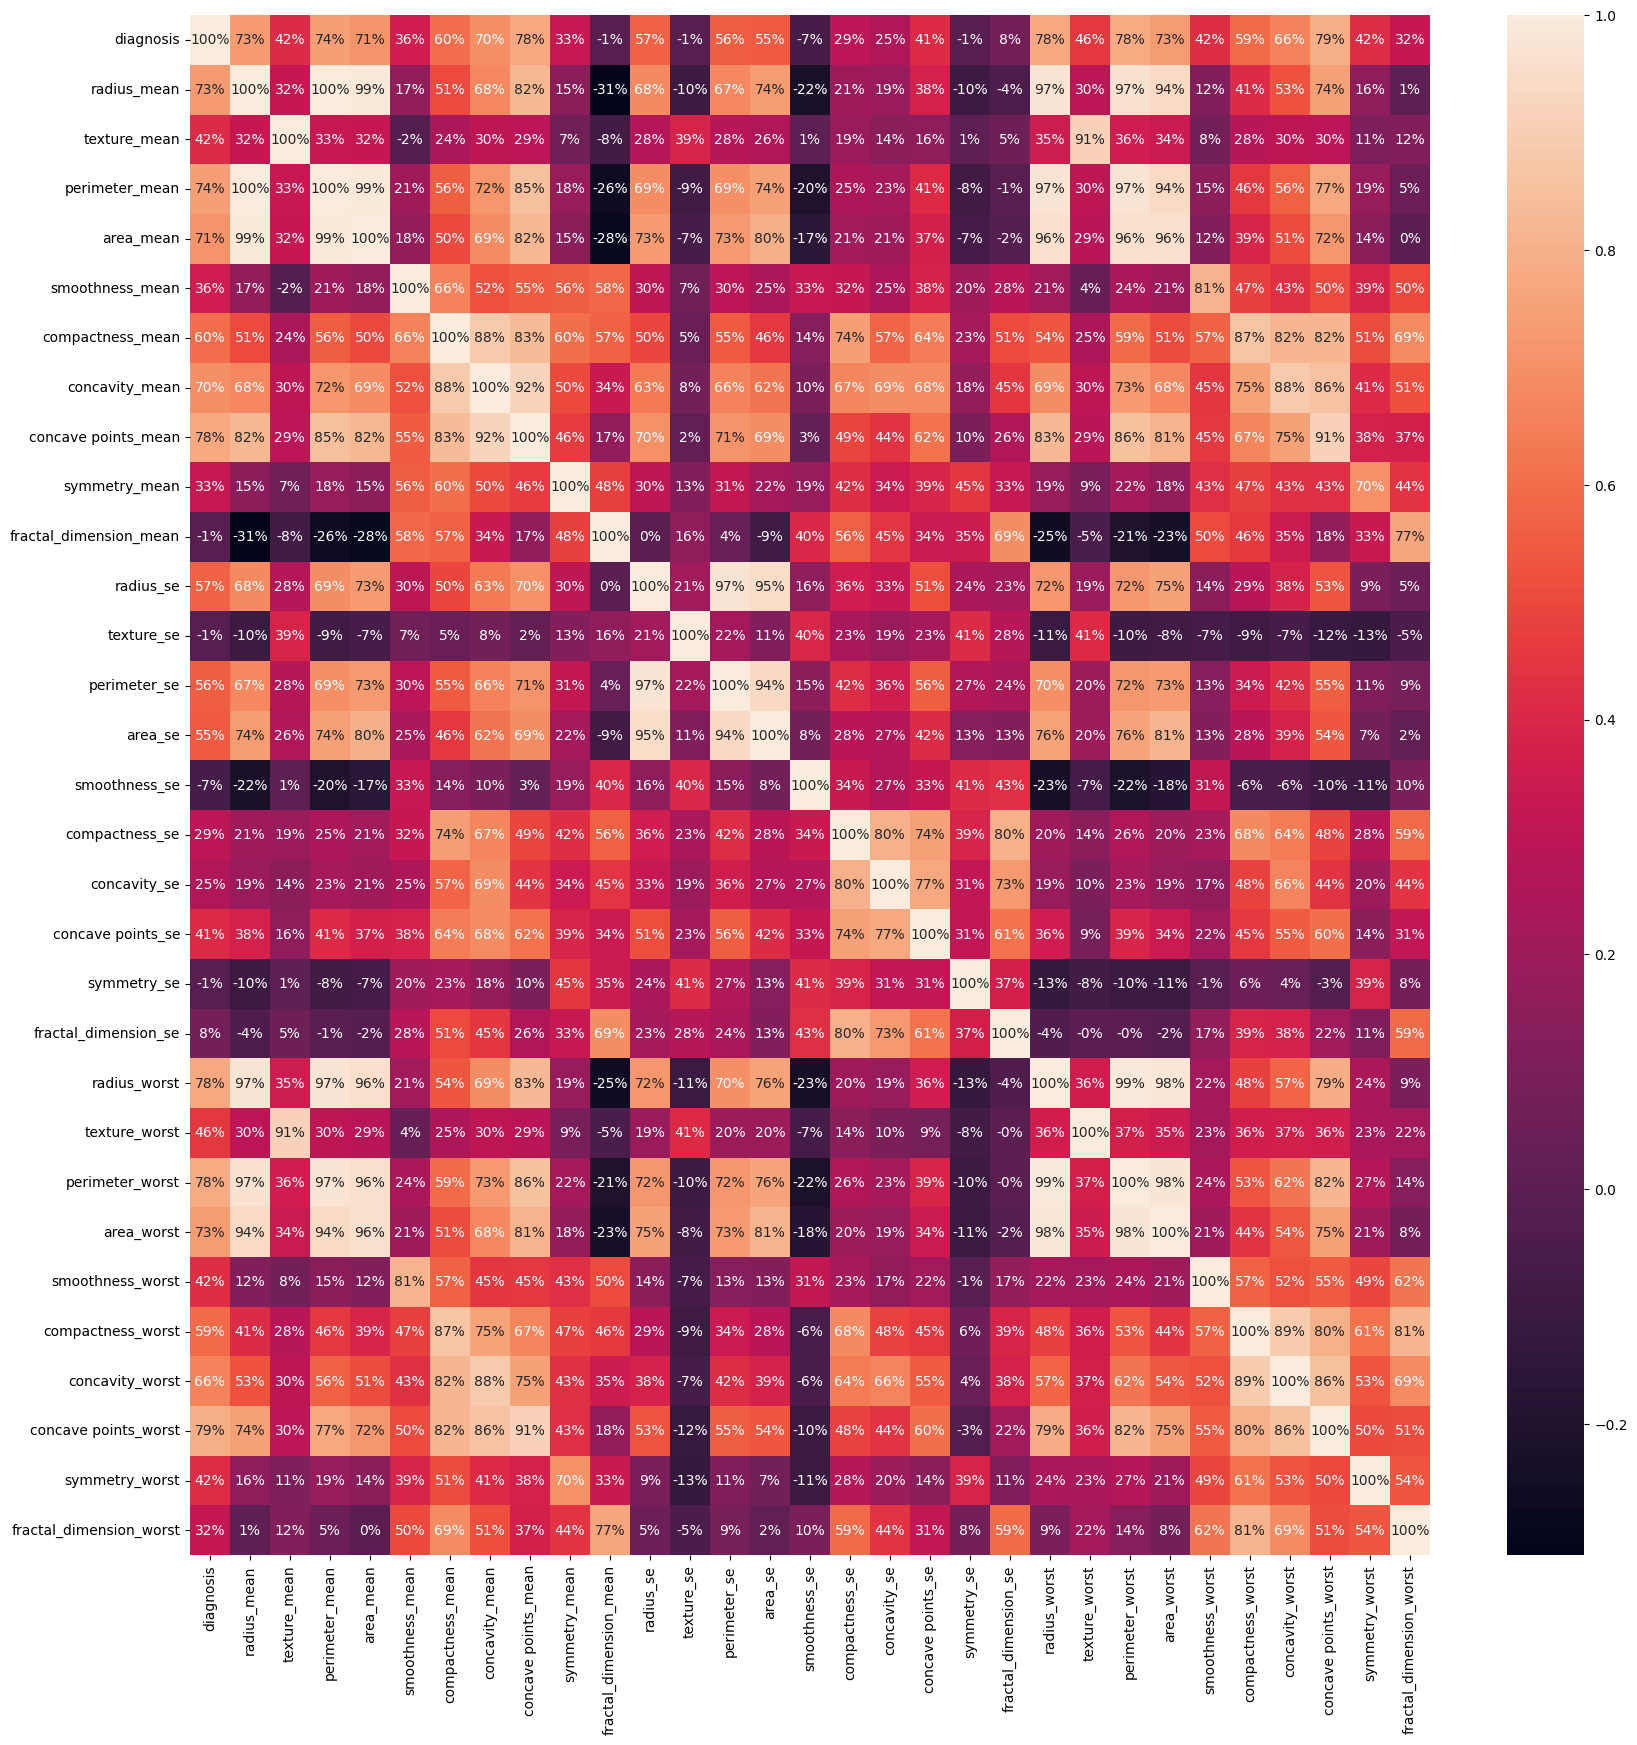

In [239]:
# plotting the heat map
plt.figure(figsize=(20,20))

sns.heatmap(features.corr(), annot=True, fmt = '.0%')

This heat map represents the correlation of each parameters that determines the results of the test.

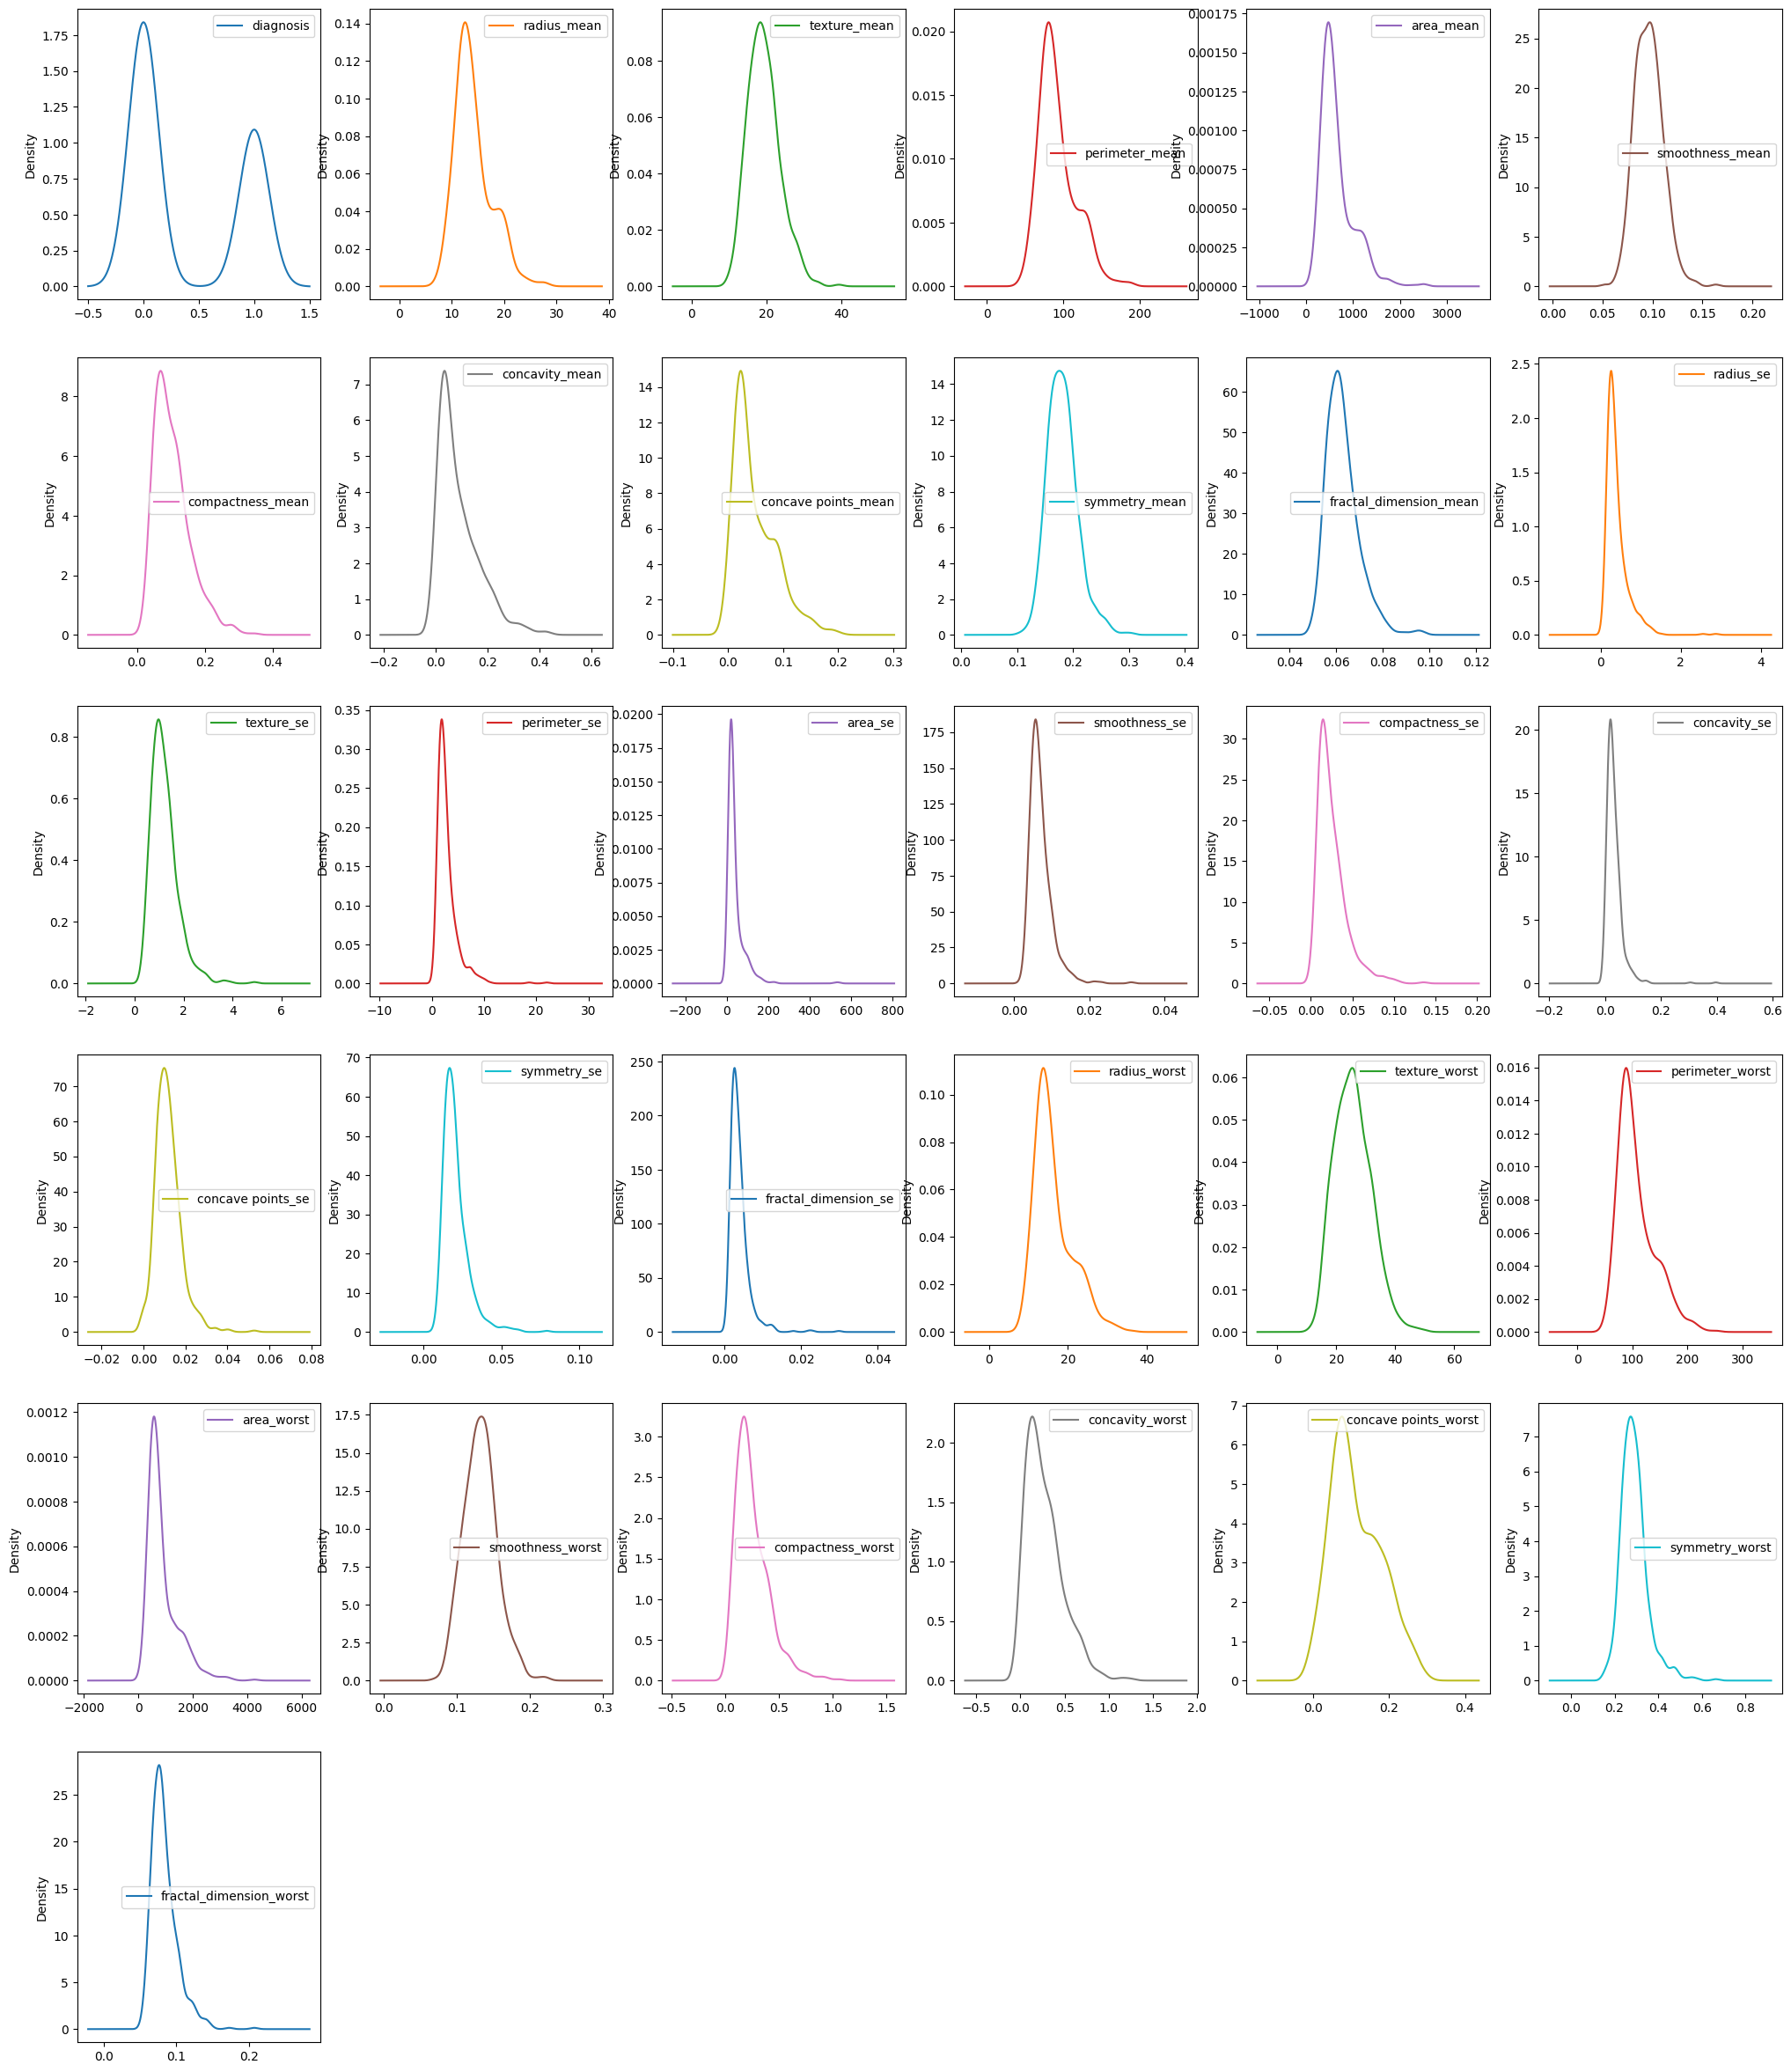

In [240]:
# density plot
plt = features.plot(kind = 'density', subplots = True, layout = (6,6), sharex = False, sharey = False, fontsize = 10, figsize = (25,30) )

# Model Building

From here, we will first split the data and then try to fit in Machine Learning Algorithms to find the perfect match for the highest accuracy.

In [241]:
# spliting the data
from sklearn.model_selection import train_test_split

x = df.drop(['diagnosis'], axis = 1)

y = df['diagnosis'].values

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

Now, we have splitted the data. Let's select the perfect model

In [242]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(x_train, y_train)
print("Logistic Regression accuracy : {:.2f}%".format(log.score(x_test,y_test)*100))

Logistic Regression accuracy : 58.77%


Here we went with the Logistic Regression Model. But, as we can see the accuracy score is less than the minimum accucracy required. Logistic Regressionn was chosen becasue it is the most popular ML algorithm for the binary classification.

In [243]:
# support vector machine

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("SVC accuracy : {:.2f}%".format(svm.score(x_test,y_test)*100))

SVC accuracy : 58.77%


In the project roadmap, the Support Vector Machine (SVM) algorithm was suggested as one of the potential classification algorithms to be used for training and evaluating the breast cancer detection model. But, as we can see the accuracy score was less here as well.

In [244]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

print("DecisionTreeClassifier accuracy : {:.2f}%".format(dt.score(x_test, y_test)*100))

DecisionTreeClassifier accuracy : 93.86%


The choice of the Decision Tree Classifier was due to several factors.


1.   It is one of the best suitable algorithm for complex dataset for classifcations.
2.   Its robustness and flexibility to deal with null values and irrelevant features.




In [245]:
# Randon Forest Classifier
from sklearn.ensemble import RandomForestClassifier

ran_forest = RandomForestClassifier()

ran_forest.fit(x_train, y_train)

print("Random Forest Classifier accuracy :{:.2f}%".format(ran_forest.score(x_test,y_test)*100))

Random Forest Classifier accuracy :95.61%


The choice Random Forest Classsifier was done as it builds several decision trees and merge their prerdictions. Moreover, this gives more accurate predictions as it is a successor to the Decision Tree Classifier.

In [246]:
# XGBoost
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(x_train, y_train)
print("XGBoost Classifier Accuracy :{:.2f}%".format(xg.score(x_test, y_test)*100))

XGBoost Classifier Accuracy :98.25%


Now, choosing the xgboost classifier due to its high performing capability. This algorithm is very helpful when it  comes large and unbalanced datasets.

After Experimenting several classification algorithms for breast cancer analysis. We come to final point with the highest accruacy score of 98.25% from the xgboost classifier. Thus, we select the XGBoost Classifier as the final training model for this dataset.

Making Prediction for a Single Record

In [247]:
x_test_single = x_test.iloc[0, :]
prediction = xg.predict([x_test_single.values])

# Display the predicted class
predicted_class = '1=Malignant(Cancerous)Present'  if prediction[0] == 1 else '0=Benign(Non-Cancerous)Absent'
print(f"Predicted Class: {predicted_class}")

Predicted Class: 1=Malignant(Cancerous)Present


As we can see that we have used one single data from the test data set to predict the acccuracy of the algorithm.